In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tqdm.auto import tqdm

In [3]:
import mctspy as mct

In [4]:
g = mct.beta_scaling_function (lam=0.74, sigma=-1.0, delta=0.0, store=True)

In [5]:
correlators = mct.CorrelatorStack([g])

In [6]:
pbar = tqdm(total=g.blocks+1)
correlators.solve_all(callback=lambda d, bs2, bs, c: pbar.update(1))
pbar.close()

  0%|          | 0/61 [00:00<?, ?it/s]

In [7]:
a, b = mct.util.exponents(0.74)

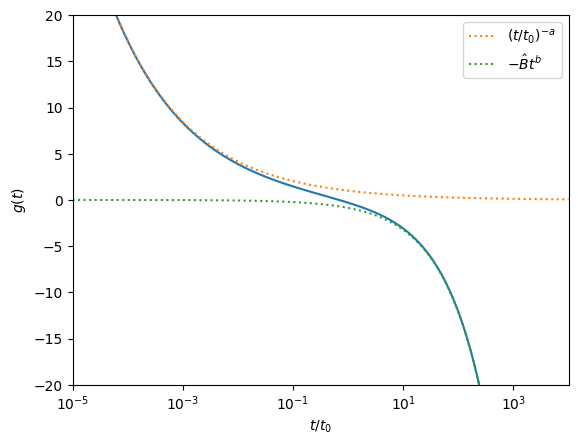

In [8]:
plt.plot(g.t[1:], g.phi[1:,0])
plt.plot(g.t[1:], np.power(g.t[1:],-a),linestyle='dotted', label=r'$(t/t_0)^{-a}$')
plt.plot(g.t[1:], -0.861*np.power(g.t[1:],b),linestyle='dotted', label=r'$-\hat B t^{b}$')
plt.xscale('log')
plt.xlim(1e-5,1e4)
plt.ylim(-20,20)
plt.xlabel(r'$t/t_0$')
plt.ylabel(r'$g(t)$')
plt.legend()
plt.show()

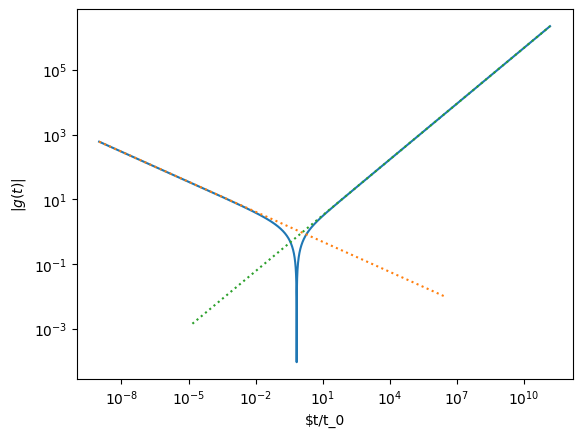

In [9]:
plt.plot(g.t[1:], np.abs(g.phi[1:,0]))
plt.plot(g.t[1:-2000], np.power(g.t[1:-2000],-a),linestyle='dotted')
plt.plot(g.t[1000:], 0.861*np.power(g.t[1000:],b),linestyle='dotted')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$t/t_0')
plt.ylabel(r'$|g(t)|$')
plt.show()

In [10]:
ltab = np.linspace(0.5,0.98,49)
Btab = []
for l in tqdm(ltab):
    g = mct.beta_scaling_function (lam=l, sigma=-1.0, delta=0.0, store=True)
    mct.CorrelatorStack([g]).solve_all()
    a, b = mct.util.exponents(l)
    Btab.append(np.mean((g.phi[1:,0]*np.power(g.t[1:],-b))[-50:]))
Btab = np.array(Btab)

  0%|          | 0/49 [00:00<?, ?it/s]

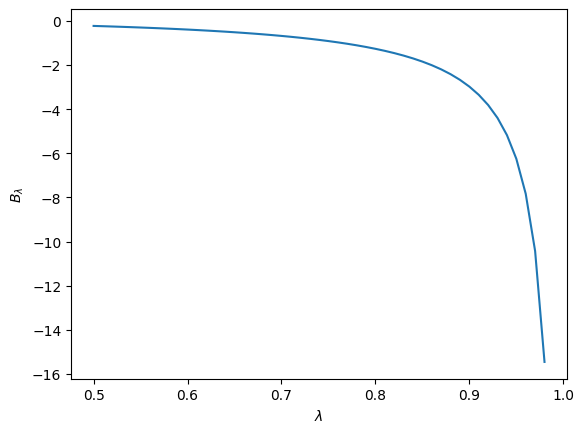

In [11]:
plt.plot(ltab,Btab)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$B_\lambda$')
plt.show()

In [12]:
import tabulate

In [13]:
padded=np.pad(np.array((ltab,Btab)).T,((0,5),(0,0)),mode='constant',constant_values=np.nan)
tabulated=np.transpose(padded.reshape(-1,9,2),axes=(1,0,2)).reshape(-1,12)
tabulate.tabulate(tabulated, tablefmt='html', floatfmt=".3f", headers=[r'$\lambda$',r'$B_\lambda$']*6)

$\lambda$,$B_\lambda$,$\lambda$,$B_\lambda$,$\lambda$,$B_\lambda$,$\lambda$,$B_\lambda$,$\lambda$,$B_\lambda$,$\lambda$,$B_\lambda$
0.500,-0.228,0.590,-0.372,0.680,-0.608,0.770,-1.036,0.860,-2.008,0.950,-6.249
0.510,-0.241,0.600,-0.393,0.690,-0.643,0.780,-1.106,0.870,-2.196,0.960,-7.836
0.520,-0.254,0.610,-0.414,0.700,-0.681,0.790,-1.182,0.880,-2.415,0.970,-10.430
0.530,-0.269,0.620,-0.437,0.710,-0.721,0.800,-1.265,0.890,-2.672,0.980,-15.457
0.540,-0.284,0.630,-0.462,0.720,-0.764,0.810,-1.357,0.900,-2.978,nan,nan
0.550,-0.300,0.640,-0.487,0.730,-0.810,0.820,-1.459,0.910,-3.351,nan,nan
0.560,-0.316,0.650,-0.515,0.740,-0.860,0.830,-1.572,0.920,-3.812,nan,nan
0.570,-0.334,0.660,-0.544,0.750,-0.914,0.840,-1.700,0.930,-4.400,nan,nan
0.580,-0.352,0.670,-0.575,0.760,-0.973,0.850,-1.844,0.940,-5.176,nan,nan
